In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

$$ k = 1 - \cfrac{I_{\text{small}}}{I_{\text{big}}} $$

$$ \sigma_k = \sqrt{\left(\cfrac{\partial k}{\partial I_{\text{small}}}\right)^2 \sigma_{I_{\text{small}}}^2 + \left(\cfrac{\partial k}{\partial I_{\text{big}}}\right)^2 \sigma_{I_{\text{big}}}^2 } = \sqrt{\left(\cfrac{1 - k}{I_{\text{small}}}\right)^2 \sigma_{I_{\text{small}}}^2 + \left(\cfrac{1 - k}{I_{\text{big}}}\right)^2 \sigma_{I_{\text{big}}}^2 } = \left(1 - k\right) \sqrt{\left(\cfrac{\sigma_{I_{\text{small}}}}{I_{\text{small}}}\right)^2 + \left(\cfrac{\sigma_{I_{\text{big}}}}{I_{\text{big}}}\right)^2} $$

In [ ]:
# "U"       - напряжение на микроскопе, кВ
sigma_U = 0.005 # кВ

# "small_I" - то с внешней поверхности цилиндра
sigma_small_I = 0.0005 # нА
sigma_big_I   = 0.0005 # нА

# "big_I"   - ток через электронный скотч на дне нА

data = pd.DataFrame({
    "U":             [1.00,   5.00,   10.00,  15.00,  20.00,  25.00,  30.00],  # кВ
    "small_I":       [0.0465, 0.0325, 0.0525, 0.0765, 0.1010, 0.1140, 0.1285], # нА
    "sigma_small_I": [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005], # нА
    "big_I":         [0.0484, 0.0405, 0.0670, 0.1000, 0.1330, 0.1515, 0.1705], # нА
    "sigma_big_I":   [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005], # нА
})


data["coef"] = (data["big_I"] - data["small_I"]) / data["big_I"]
data["sigma_coef"] = (1 - data["coef"]) * np.sqrt(
    np.square(data["sigma_small_I"] / data["small_I"]) + np.square(data["sigma_big_I"] / data["big_I"])
)

In [ ]:
data_girls = pd.DataFrame({
    "U":             [1,    1.5,  2,    5,    10,   12.5, 15,    17,    20,    25,    30],    # кВ
    "small_I":       [42.5, 31.7, 29.7, 32.8, 51.7, 63.8, 76.9,  88.3,  102.2, 114.7, 128.9], # пА
    "sigma_small_I": [0.1,  0.1,  0.2,  0.5,  0.5,  0.5,  0.4,   0.3,   0.3,   0.3,   0.5],   # пА
    "big_I":         [42.3, 34.8, 33.4, 41.0, 67.9, 84.6, 102.4, 117.6, 136.2, 152.5, 171.6], # пА
    "sigma_big_I":   [0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,   0.1,   0.1,   0.1,   0.1]
})


data_girls["coef"] = (data_girls["big_I"] - data_girls["small_I"]) / data_girls["big_I"]
data_girls["sigma_coef"] = (1 - data_girls["coef"]) * np.sqrt(
    np.square(data_girls["sigma_small_I"] / data_girls["small_I"]) + np.square(data_girls["sigma_big_I"] / data_girls["big_I"])
)

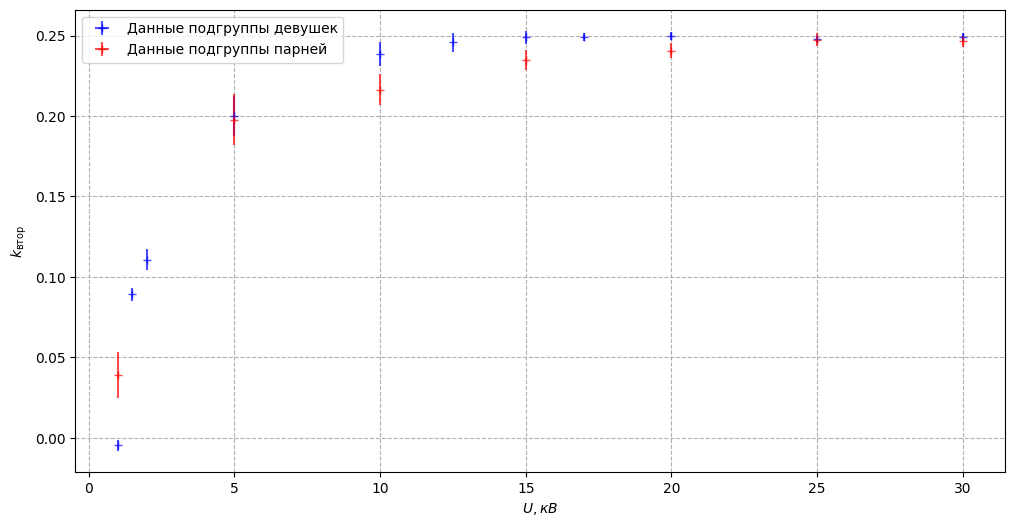

In [39]:
plt.figure(figsize=(12, 6))
plt.grid(True, linestyle='--')
plt.xlabel(r"$U, кВ$")
plt.ylabel(r"$k_\text{втор}$")

plt.errorbar(data_girls["U"], data_girls["coef"], xerr=sigma_U, yerr=data_girls["sigma_coef"], fmt="+b", label="Данные подгруппы девушек", alpha=0.7)
plt.errorbar(data["U"], data["coef"], xerr=sigma_U, yerr=data["sigma_coef"], fmt="+r", label="Данные подгруппы парней", alpha=0.7)

plt.legend()
plt.show()